In [ ]:
%pip install matplotlib
%pip install numpy

In [92]:
hidden_dim_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
val_accuracies = [0.2793, 0.6464, 0.7311, 0.8011, 0.8030, 0.8199, 0.8249, 0.8390, 0.8445, 0.8517, 0.8531, 0.8496, 0.8553]
mflops = [0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.10, 0.10, 0.12, 0.15, 0.22, 0.35, 0.61]
losses = [1.6440, 0.9881, 0.7750, 0.5959, 0.5895, 0.538, 0.5378, 0.5037, 0.5090, 0.4955, 0.4993, 0.5256, 0.5245]
latencies = [0.001367, 0.001433, 0.001214, 0.001505, 0.001734, 0.001508, 0.001302, 0.001118, 0.000965, 0.001887, 0.001069, 0.000942, 0.001363]

In [ ]:
import matplotlib.pyplot as plt

# Set font sizes globally
plt.rcParams.update({
    'font.size': 16,        # Base font size
    'axes.titlesize': 20,   # Title font size
    'axes.labelsize': 18,   # Axis label font size
    'xtick.labelsize': 14,  # X-axis tick label font size
    'ytick.labelsize': 14,  # Y-axis tick label font size
    'legend.fontsize': 14,  # Legend font size
})

# Create the first plot for val_accuracies
plt.figure(figsize=(10, 5))
plt.plot(hidden_dim_sizes, val_accuracies, marker='o', linestyle='-', color='b')
# Annotate the test accuracies
for i, txt in enumerate(val_accuracies):
    if txt != 0:  # Only annotate non-zero values to avoid cluttering
        plt.text(hidden_dim_sizes[i], txt + 0.03, f'{txt:.3f}', fontsize=9, ha='right', color='b')
plt.title('Test Accuracies vs. Hidden Dimension Sizes')
plt.xlabel('Hidden Dimension Sizes')
plt.ylabel('Test Accuracies')
plt.grid(True)
plt.xscale('log')  # Log scale for better visualization of varying sizes
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# Create the second plot for mflops
plt.figure(figsize=(10, 5))
plt.plot(hidden_dim_sizes, mflops, marker='o', linestyle='-', color='g')
# Annotate the FLOPS
for i, txt in enumerate(mflops):
    if txt != 0:  # Only annotate non-zero values to avoid cluttering
        plt.text(hidden_dim_sizes[i], txt + 0.01, f'{txt:.3f}', fontsize=9, ha='right', color='g')
plt.title('MFLOPS vs. Hidden Dimension Sizes')
plt.xlabel('Hidden Dimension Sizes')
plt.ylabel('MFLOPS')
plt.grid(True)
plt.xscale('log')  # Log scale for better visualization of varying sizes
plt.show()

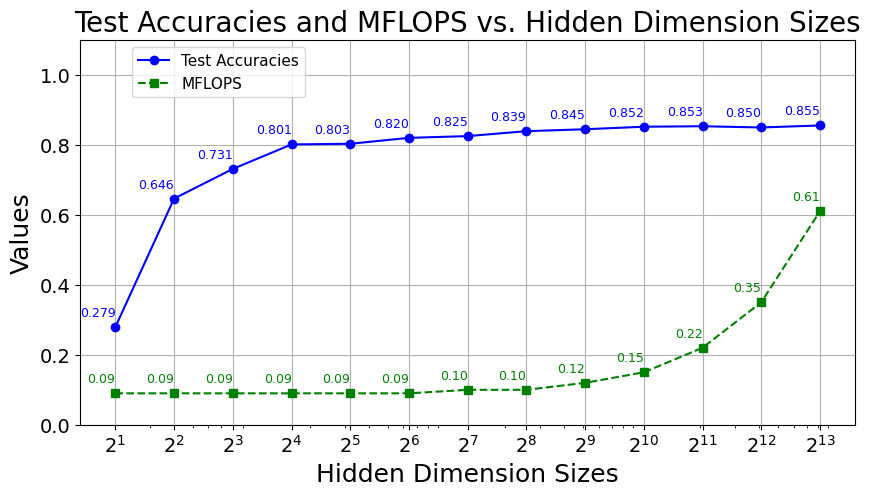

In [93]:
import numpy as np

# Set font sizes globally
plt.rcParams.update({
    'font.size': 16,        # Base font size
    'axes.titlesize': 20,   # Title font size
    'axes.labelsize': 18,   # Axis label font size
    'xtick.labelsize': 14,  # X-axis tick label font size
    'ytick.labelsize': 14,  # Y-axis tick label font size
    'legend.fontsize': 14,  # Legend font size
})

# Create the overlay plot
plt.figure(figsize=(10, 5))

# Plot val_accuracies
plt.plot(hidden_dim_sizes, val_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracies')

for i, txt in enumerate(val_accuracies):
    if txt != 0:  # Only annotate non-zero values to avoid cluttering
        plt.text(hidden_dim_sizes[i], txt + 0.03, f'{txt:.3f}', fontsize=9, ha='right', color='b')
        
for i, txt in enumerate(mflops):
    if txt != 0:  # Only annotate non-zero values to avoid cluttering
        plt.text(hidden_dim_sizes[i], txt + 0.03, f'{txt:.2f}', fontsize=9, ha='right', color='g')

# Plot mflops
plt.plot(hidden_dim_sizes, mflops, marker='s', linestyle='--', color='g', label='MFLOPS')

# Customize the plot
plt.title('Test Accuracies and MFLOPS vs. Hidden Dimension Sizes')
plt.xlabel('Hidden Dimension Sizes')
plt.ylabel('Values')
plt.grid(True)

# Set the x-axis to display powers of 2
plt.xscale('log')  # Log scale for better visualization of varying sizes
ticks = [2**i for i in range(int(np.log2(min(hidden_dim_sizes))), int(np.log2(max(hidden_dim_sizes))) + 1)]
# Use the '2^x' format for x-tick labels
tick_labels = [f'$2^{{{int(np.log2(tick))}}}$' for tick in ticks]  # Use curly braces for proper formatting
plt.xticks(ticks, tick_labels)


plt.ylim(0, 1.1)  # Accuracy ranges from 0 to 1
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 1), fontsize=11)  # Place legend outside
plt.show()

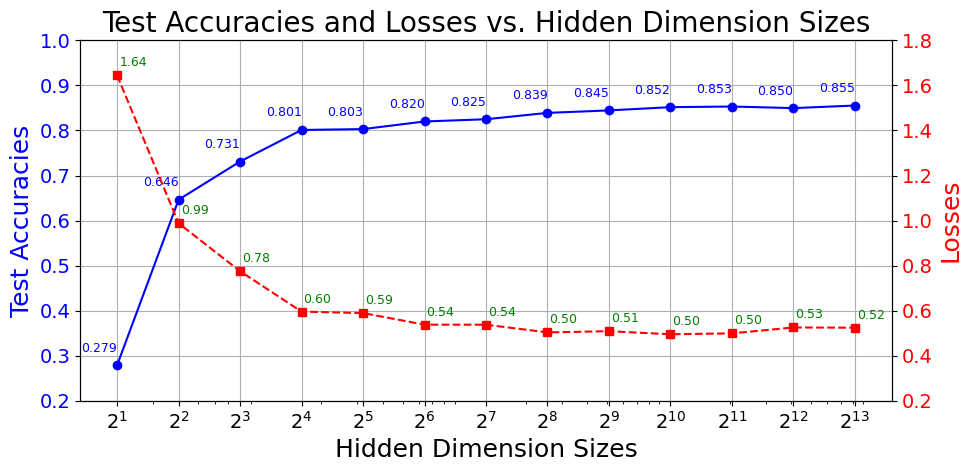

In [94]:
# Create the first plot: Val_accuracies and Losses
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot val_accuracies
ax1.plot(hidden_dim_sizes, val_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracies')
ax1.set_xlabel('Hidden Dimension Sizes')
ax1.set_ylabel('Test Accuracies', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.ylim(0.2, 1)  # Accuracy ranges from 0 to 1

for i, txt in enumerate(val_accuracies):
    if txt != 0:  # Only annotate non-zero values to avoid cluttering
        plt.text(hidden_dim_sizes[i], txt + 0.03, f'{txt:.3f}', fontsize=9, ha='right', color='b')

# Create second y-axis for losses
ax2 = ax1.twinx()
ax2.plot(hidden_dim_sizes, losses, marker='s', linestyle='--', color='r', label='Losses')
ax2.set_ylabel('Losses', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0.2, 1.8)  # Set the y-limits of the red axis to (0, 1.7)

# Set the x-axis to display powers of 2
plt.xscale('log')  # Log scale for better visualization of varying sizes
ticks = [2**i for i in range(int(np.log2(min(hidden_dim_sizes))), int(np.log2(max(hidden_dim_sizes))) + 1)]
# Use the '2^x' format for x-tick labels
tick_labels = [f'$2^{{{int(np.log2(tick))}}}$' for tick in ticks]  # Use curly braces for proper formatting
plt.xticks(ticks, tick_labels)

for i, txt in enumerate(losses):
    if txt != 0:  # Only annotate non-zero values to avoid cluttering
        plt.text(hidden_dim_sizes[i] * 1.4, txt + 0.04, f'{txt:.2f}', fontsize=9, ha='right', color='g')

# Add a title and a grid
ax1.set_title('Test Accuracies and Losses vs. Hidden Dimension Sizes')
ax1.grid(True)

# Show the plot with both y-axes
fig.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

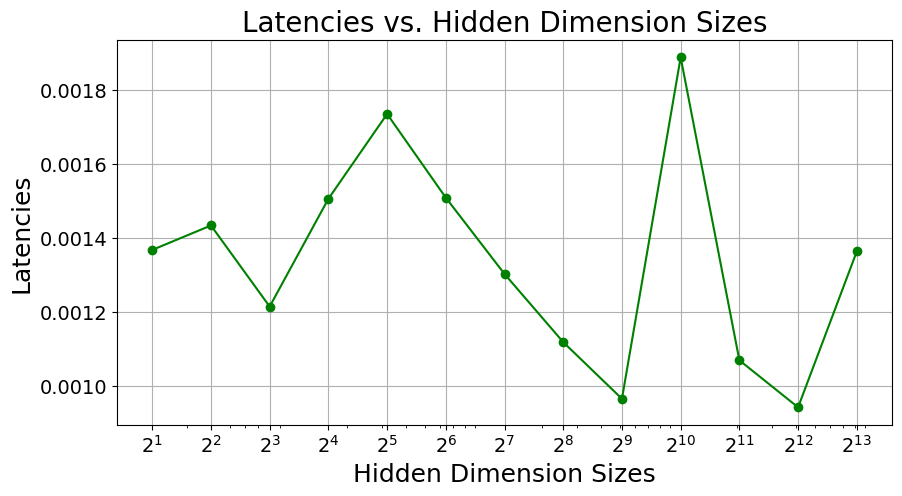

In [95]:
# Create the second plot: Latencies
plt.figure(figsize=(10, 5))

# Plot latencies
plt.plot(hidden_dim_sizes, latencies, marker='o', linestyle='-', color='g', label='Latencies')
plt.title('Latencies vs. Hidden Dimension Sizes')
plt.xlabel('Hidden Dimension Sizes')
plt.ylabel('Latencies')
plt.grid(True)

# Set the x-axis to display powers of 2
plt.xscale('log')  # Log scale for better visualization of varying sizes
ticks = [2**i for i in range(int(np.log2(min(hidden_dim_sizes))), int(np.log2(max(hidden_dim_sizes))) + 1)]
# Use the '2^x' format for x-tick labels
tick_labels = [f'$2^{{{int(np.log2(tick))}}}$' for tick in ticks]  # Use curly braces for proper formatting
plt.xticks(ticks, tick_labels)

# Show the plot
plt.show()